In [ ]:
import json 
import logging
import copy
import sys
import ast
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import ast 

# Dynamically get the backend path relative to the notebook location
notebook_path = Path().resolve()
project_root = notebook_path.parents[1]  # Go up to project root (adjust if needed)
sys.path.insert(0, str(project_root))
local_path = project_root / 'back_end'
sys.path.insert(0, str(local_path))

from src.utils.utils import *
from src.utils.logging_utils import *
from main import *
from back_end.src.plotting import *

multimer_size = 5

# download CSV files
def download_data_dict(multimer_size):
    input_dir = project_root / 'back_end' / 'data' / 'filtered_reaction_database' / f'multimer_size_{multimer_size}'

    combined_database = pd.read_csv(input_dir / 'combined_database.csv', index_col=0)
    context_history = pd.read_csv(input_dir / 'context_history.csv', index_col=0)
    donor_history = pd.read_csv(input_dir / 'donor_history.csv', index_col=0)
    reaction_history = pd.read_csv(input_dir / 'reaction_history.csv', index_col=0)
    ubiquitin_history = pd.read_csv(input_dir / 'ubiquitin_history.csv', index_col=0)

    return {
        'combined_database': combined_database,
        'context_history': context_history,
        'donor_history': donor_history,
        'reaction_history': reaction_history,
        'ubiquitin_history': ubiquitin_history
    }

data_dict = download_data_dict(multimer_size)
combined_database = data_dict['combined_database']
context_history = data_dict['context_history']
donor_history = data_dict['donor_history']
reaction_history = data_dict['reaction_history']
ubiquitin_history = data_dict['ubiquitin_history']

/Users/ekummelstedt/le_code_base/ubiquitinformatics/back_end/src/fast_api.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimer_acceptors_96['dimer_names'] = dimer_acceptors_96['dimer_formation'].apply(
/Users/ekummelstedt/le_code_base/ubiquitinformatics/back_end/src/fast_api.py:492: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimer_acceptors_96['dimers_encoded'] = dimer_acceptors_96['dimer_names'].map(dimer_encoded_dictionary)
/Users/ekummelstedt/le_code_base/ubiquitinformatics/back_end/src/fast_ap

(<Figure size 1500x700 with 1 Axes>, <Axes: >)

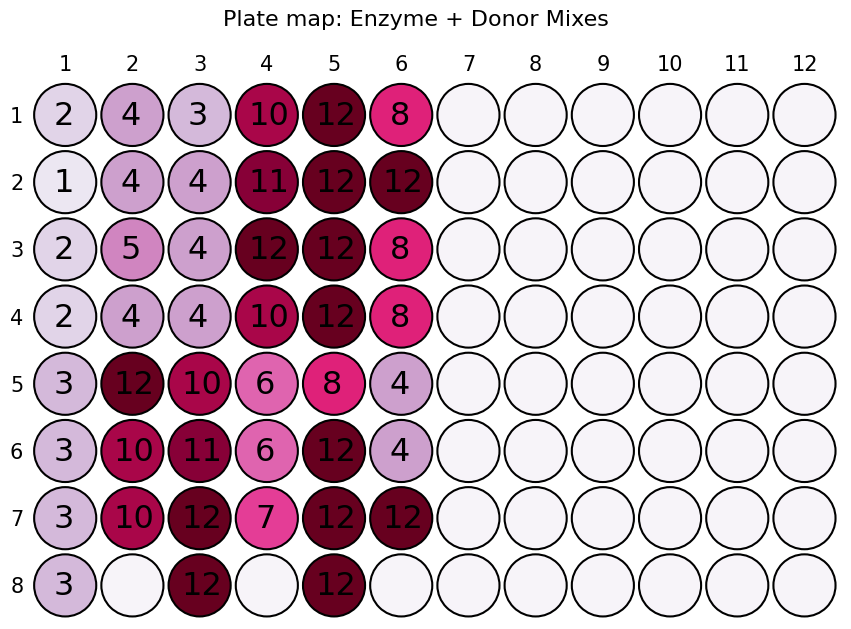

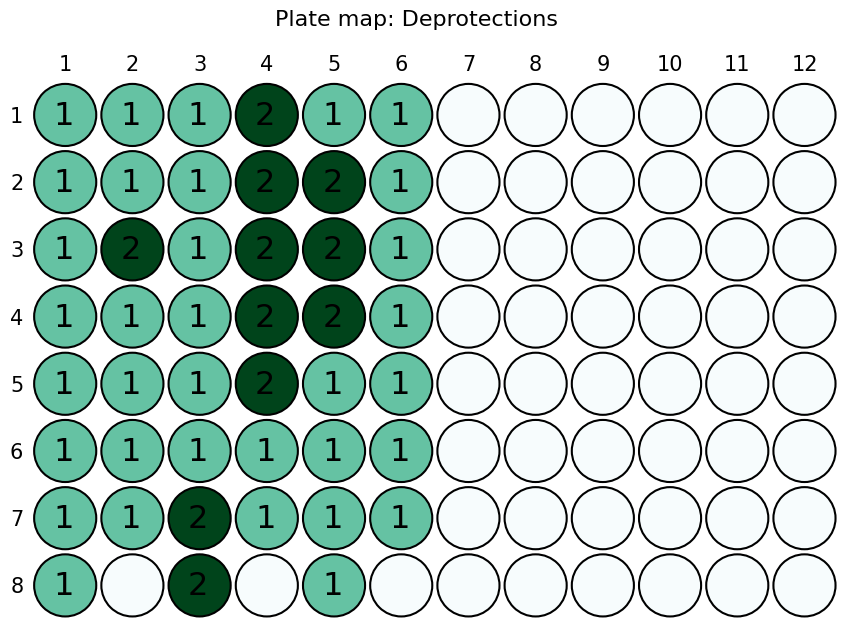

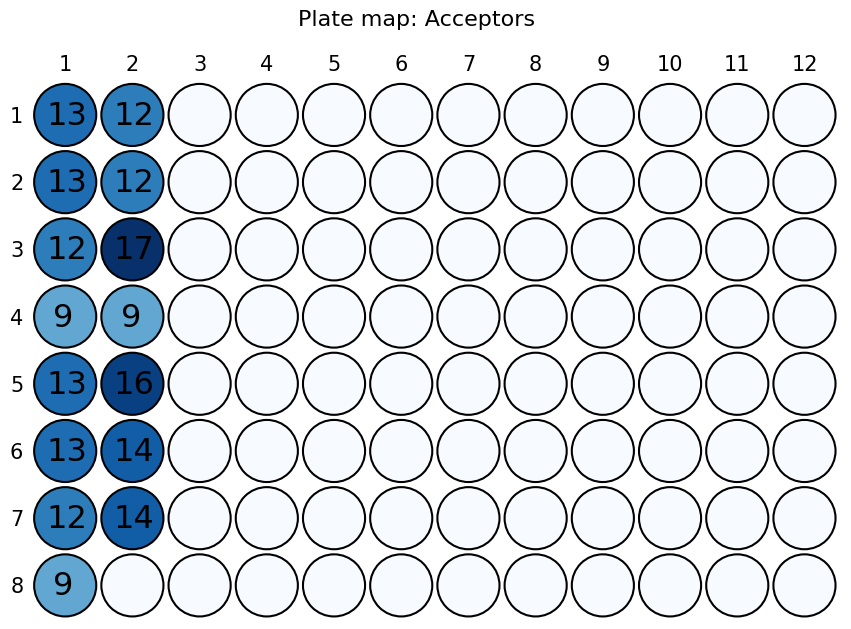

In [5]:
# Create plate maps for acceptors and deprotections
# Indexed values for tetramers and pentamers
test_indexed_values_tetramers = [423, 427, 363, 31, 443, 447, 95, 143, 191, 315, 319, 279, 335, 339]
test_indexed_values_pentamers = [
    2035, 2039, 1975, 1655, 47, 2055, 2059, 1719, 111, 1735, 1739, 1039, 127, 871,
    2143, 2147, 2107, 1075, 2163, 2167, 431, 411, 875, 639, 643, 479, 787, 835,
    1491, 1495, 1475, 1307, 1511, 1515, 1311, 1223, 1271, 1599, 1603, 1563, 1619, 1623
]

if multimer_size == 4:
    indexed_values = test_indexed_values_tetramers
elif multimer_size == 5:
    indexed_values = test_indexed_values_pentamers[1:16]

output_dict = inner_create_plate_dfs(data_dict, indexed_values, multimer_size)

enzymes_donors_96 = output_dict['enzymes_donors_96']
deprots_96 = output_dict['deprots_96']
acceptors_96 = output_dict['dimer_acceptors_96']

plot_96wells(cdata=enzymes_donors_96, figure=1, figure_name='Plate map: Enzyme + Donor Mixes', colorbar_type='PuRd')
plot_96wells(cdata=deprots_96, figure=2, figure_name='Plate map: Deprotections', colorbar_type='BuGn')
plot_96wells(cdata=acceptors_96, figure=3, figure_name='Plate map: Acceptors', colorbar_type='Blues')